## Business Objective:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import seaborn as sns

In [2]:
CustomersData=pd.read_excel("CustomersData.xlsx")
Discount_Coupon=pd.read_csv("Discount_Coupon.csv")
Marketing_Spend=pd.read_csv("Marketing_Spend.csv")
Online_Sales=pd.read_csv("Online_Sales.csv")
Tax_amount=pd.read_excel("Tax_amount.xlsx")

In [3]:
CustomersData

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [4]:
Marketing_Spend

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30
...,...,...,...
360,12/27/2019,4000,3396.87
361,12/28/2019,4000,3246.84
362,12/29/2019,4000,2546.58
363,12/30/2019,4000,674.31


In [5]:
Discount_Coupon

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [6]:
Tax_amount

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [7]:
Discount_Coupon.columns=Discount_Coupon.columns.str.strip()

In [8]:
set(Discount_Coupon.Product_Category)

{'Accessories',
 'Android',
 'Apparel',
 'Bags',
 'Bottles',
 'Drinkware',
 'Gift Cards',
 'Headgear',
 'Housewares',
 'Lifestyle',
 'Nest',
 'Nest-Canada',
 'Nest-USA',
 'Notebooks',
 'Notebooks & Journals',
 'Office',
 'Waze'}

In [9]:
Online_Sales

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,20191231,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,20191231,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,20191231,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,20191231,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked


In [10]:
Online_Sales["Transaction_Date"]=Online_Sales["Transaction_Date"].astype(str)

In [11]:
Online_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [12]:
Online_Sales["Transaction_Date"]=pd.to_datetime(Online_Sales["Transaction_Date"])

In [13]:
Online_Sales.nunique()

CustomerID              1468
Transaction_ID         25061
Transaction_Date         365
Product_SKU             1145
Product_Description      404
Product_Category          20
Quantity                 151
Avg_Price                546
Delivery_Charges         267
Coupon_Status              3
dtype: int64

In [14]:
Tax_amount

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [15]:
Dataset1=pd.merge(Online_Sales,Tax_amount,on="Product_Category",how="inner")
Dataset1


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10
2,13047,16684,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Clicked,0.10
3,13047,16684,2019-01-01,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,81.50,6.5,Used,0.10
4,13047,16688,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.5,Used,0.10
...,...,...,...,...,...,...,...,...,...,...,...
52919,12956,48475,2019-12-31,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,355.74,6.5,Clicked,0.05
52920,12956,48477,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.5,Not Used,0.05
52921,14410,48490,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.5,Clicked,0.05
52922,14410,48491,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.5,Clicked,0.05


In [16]:
Dataset=pd.merge(Dataset1,CustomersData,on="CustomerID",how="inner")
Dataset

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Gender,Location,Tenure_Months
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,M,Chicago,12
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,M,Chicago,12
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.10,M,Chicago,12
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.10,M,Chicago,12
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.10,M,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,12990,46842,2019-12-14,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,100.91,6.5,Clicked,0.05,F,California,47
52920,12990,46843,2019-12-14,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,355.74,6.5,Used,0.05,F,California,47
52921,12990,46843,2019-12-14,GGOENEBQ093499,Nest Detect - USA,Nest,2,49.95,6.5,Clicked,0.05,F,California,47
52922,16333,47144,2019-12-16,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,355.74,6.5,Clicked,0.05,F,New York,41


In [17]:
Dataset["Month"]=Dataset["Transaction_Date"].dt.strftime('%b')
Dataset["Month_number"]=Dataset["Transaction_Date"].dt.month

In [18]:
Discount_Coupon

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [19]:
Dataset_whole=pd.merge(Dataset,Discount_Coupon,on=["Product_Category","Month"],how="inner")
Dataset_whole

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Gender,Location,Tenure_Months,Month,Month_number,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,M,Chicago,12,Jan,1,ELEC10,10
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.10,M,Chicago,12,Jan,1,ELEC10,10
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.10,M,Chicago,12,Jan,1,ELEC10,10
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.10,M,Chicago,12,Jan,1,ELEC10,10
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.10,M,Chicago,12,Jan,1,ELEC10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,17634,33973,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.00,0.0,Clicked,0.05,F,Chicago,32,Jul,7,GC10,10
52520,17634,33975,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.00,0.0,Not Used,0.05,F,Chicago,32,Jul,7,GC10,10
52521,16085,39991,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1,10.80,6.0,Clicked,0.05,M,California,15,Oct,10,NJ10,10
52522,16085,39991,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1,9.60,6.0,Used,0.05,M,California,15,Oct,10,NJ10,10


In [20]:
Dataset_whole.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52524 entries, 0 to 52523
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  int64         
 1   Transaction_ID       52524 non-null  int64         
 2   Transaction_Date     52524 non-null  datetime64[ns]
 3   Product_SKU          52524 non-null  object        
 4   Product_Description  52524 non-null  object        
 5   Product_Category     52524 non-null  object        
 6   Quantity             52524 non-null  int64         
 7   Avg_Price            52524 non-null  float64       
 8   Delivery_Charges     52524 non-null  float64       
 9   Coupon_Status        52524 non-null  object        
 10  GST                  52524 non-null  float64       
 11  Gender               52524 non-null  object        
 12  Location             52524 non-null  object        
 13  Tenure_Months        52524 non-

#  Calculate Invoice amount or sale_amount or revenue for each transaction and item level

In [21]:
# Invoice Value =(( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST))+Delivery_Charges
Dataset_whole["Invoice_value"]=((Dataset_whole["Quantity"]*Dataset_whole["Avg_Price"])*(1-Dataset_whole["Discount_pct"]/100)*(1+Dataset_whole["GST"]))+(Dataset_whole["Delivery_Charges"])
Dataset_whole["Sales_Revenue"]=((Dataset_whole["Quantity"]*Dataset_whole["Avg_Price"])*(1-Dataset_whole["Discount_pct"]/100))

In [22]:
Dataset_whole.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Month_number', 'Coupon_Code', 'Discount_pct',
       'Invoice_value', 'Sales_Revenue'],
      dtype='object')

# Perform Detailed exploratory analysis


###  Understanding how many customers acquired every month

In [23]:
cust_month = Dataset_whole.loc[:, ['CustomerID', 'Month']] 
cust_month

,CustomerID,Month
0,17850,Jan
1,17850,Jan
2,17850,Jan
3,17850,Jan
4,17850,Jan
...,...,...
52519,17634,Jul
52520,17634,Jul
52521,16085,Oct
52522,16085,Oct


In [24]:
cust_month.drop_duplicates(subset='CustomerID',keep="first", inplace= True)
cust_month

,CustomerID,Month
0,17850,Jan
128,13047,Jan
132,12583,Jan
133,15100,Jan
134,14688,Jan
...,...,...
50359,17870,Mar
50603,16138,Mar
50604,13481,Mar
50997,14866,Apr


In [25]:
custom_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
New_cust_every_mnt=cust_month.groupby("Month")[["CustomerID"]].count().loc[custom_order]
New_cust_every_mnt

,CustomerID
Month,
Jan,215
Feb,45
Mar,134
Apr,103
May,73
Jun,130
Jul,70
Aug,215
Sep,111


Text(0.5, 1.0, 'New_cust_every_mnt')

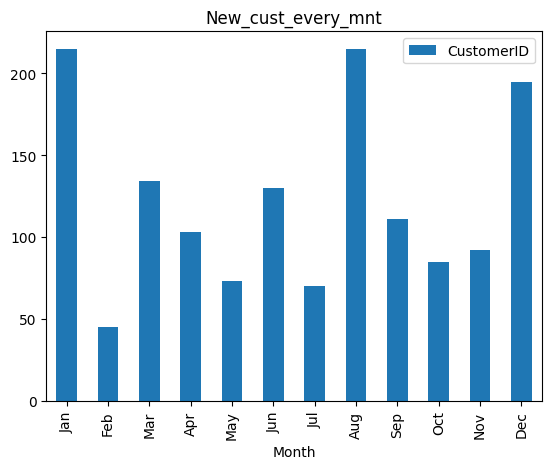

In [26]:
New_cust_every_mnt.plot(kind="bar")
plt.title("New_cust_every_mnt")

##  Understand the retention of customers on month on month basis

In [27]:
Total_customer=cust_month.groupby("Month")[["CustomerID"]].count().reset_index()
Total_cust_every_month=Dataset_whole.groupby("Month")[["CustomerID"]].count().reset_index()
New_table=pd.merge(Total_customer,Total_cust_every_month,on="Month")

In [28]:
New_table.rename(columns={"CustomerID_x":"New_cust_every_mnt","CustomerID_y":"Total_customer_count"},inplace=True)

In [29]:
New_table["Retained_customer"]=(New_table["Total_customer_count"])-(New_table["New_cust_every_mnt"])
New_table.set_index("Month",inplace=True)

<Axes: xlabel='Month'>

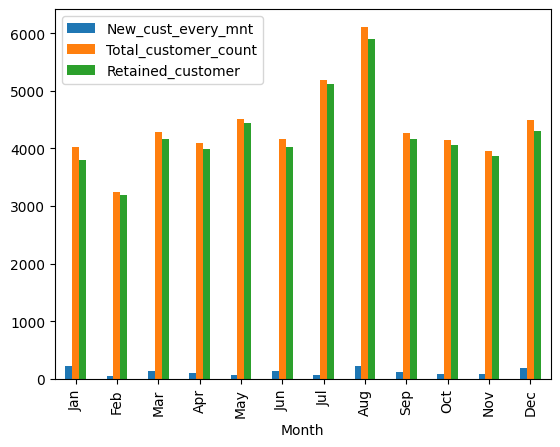

In [30]:
(New_table.loc[custom_order]).plot(kind="bar")

##  How the revenues from existing/new customers on month on month basis

In [31]:
New_customer_with_revenue=(Dataset_whole.loc[:, ["CustomerID","Month","Sales_Revenue"]]).drop_duplicates(subset="CustomerID",keep="first")

In [32]:
New_customer_with_revenue

,CustomerID,Month,Sales_Revenue
0,17850,Jan,138.339
128,13047,Jan,220.986
132,12583,Jan,110.493
133,15100,Jan,138.339
134,14688,Jan,138.339
...,...,...,...
50359,17870,Mar,13.993
50603,16138,Mar,1.960
50604,13481,Mar,1.960
50997,14866,Apr,13.671


In [33]:
pd.options.display.float_format = '{:.2f}'.format
Total_revenue_bymnt=Dataset_whole.groupby("Month")[["Sales_Revenue"]].sum().loc[custom_order]
Total_revenue_bymnt

,Sales_Revenue
Month,
Jan,360949.35
Feb,246658.92
Mar,241980.71
Apr,357159.75
May,243165.42
Jun,223357.22
Jul,332562.23
Aug,319556.82
Sep,251858.07


<Axes: xlabel='Month'>

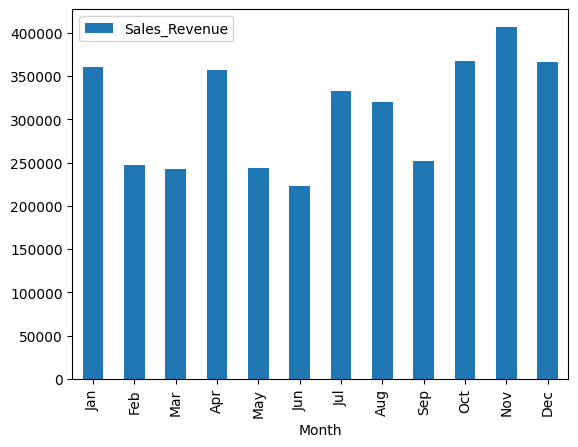

In [34]:
Total_revenue_bymnt.plot(kind="bar")

 ##  How the discounts playing role in the revenues?

In [35]:
Discount_impact_on_sales=Dataset_whole.groupby("Discount_pct")[["Sales_Revenue"]].sum()
Discount_impact_on_sales

,Sales_Revenue
Discount_pct,
10,1417943.21
20,1216247.30
30,1083476.74


<Axes: xlabel='Discount_pct'>

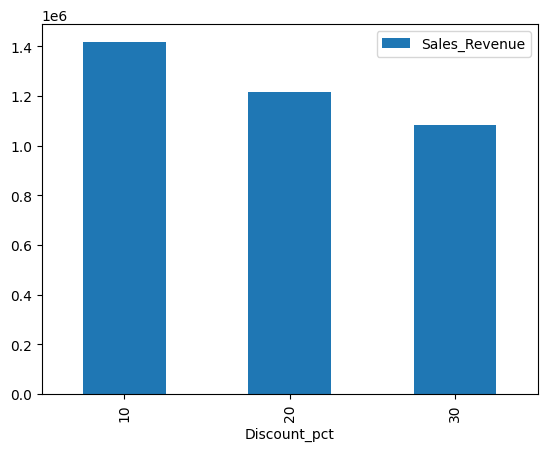

In [36]:
Discount_impact_on_sales.plot(kind="bar")

##  Analyse KPI’s like Revenue, number of orders, average order value, number of customers (existing/new), quantity, by category, by month, by week, by day etc…

In [37]:
Dataset_whole.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Month_number', 'Coupon_Code', 'Discount_pct',
       'Invoice_value', 'Sales_Revenue'],
      dtype='object')

In [38]:
Revenue_by_prdcat=Dataset_whole.groupby("Product_Category")[["Sales_Revenue"]].sum()
Revenue_by_prdcat

,Sales_Revenue
Product_Category,
Accessories,5899.87
Android,563.05
Apparel,473377.96
Bags,121362.72
Bottles,5528.52
Drinkware,161135.23
Gift Cards,16737.91
Headgear,43800.62
Housewares,3853.41


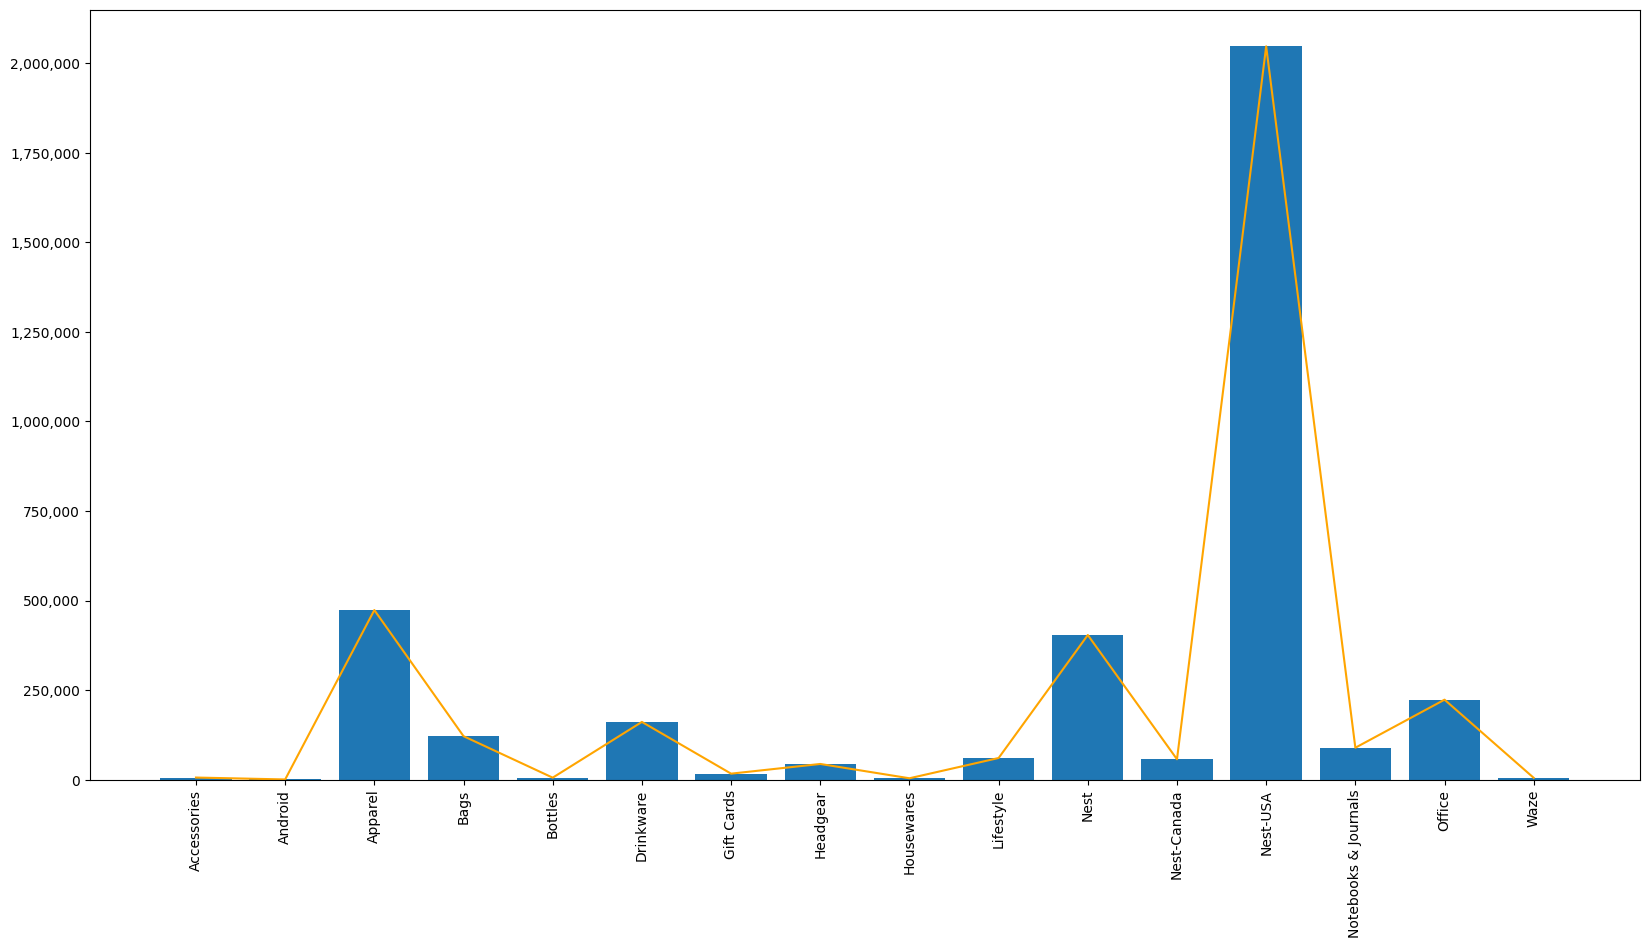

In [39]:
import matplotlib.ticker as ticker
plt.figure(figsize=(20,10))
plt.bar(Revenue_by_prdcat.index,Revenue_by_prdcat["Sales_Revenue"])
plt.plot(Revenue_by_prdcat,c="orange")
formatter = ticker.StrMethodFormatter('{x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=90)
plt.show()


In [40]:
Total_transaction=Dataset_whole.drop_duplicates(subset=["Transaction_ID"],keep="first")
Total_unique_transaction=Total_transaction.groupby("Month")[["Transaction_ID"]].count().loc[custom_order]

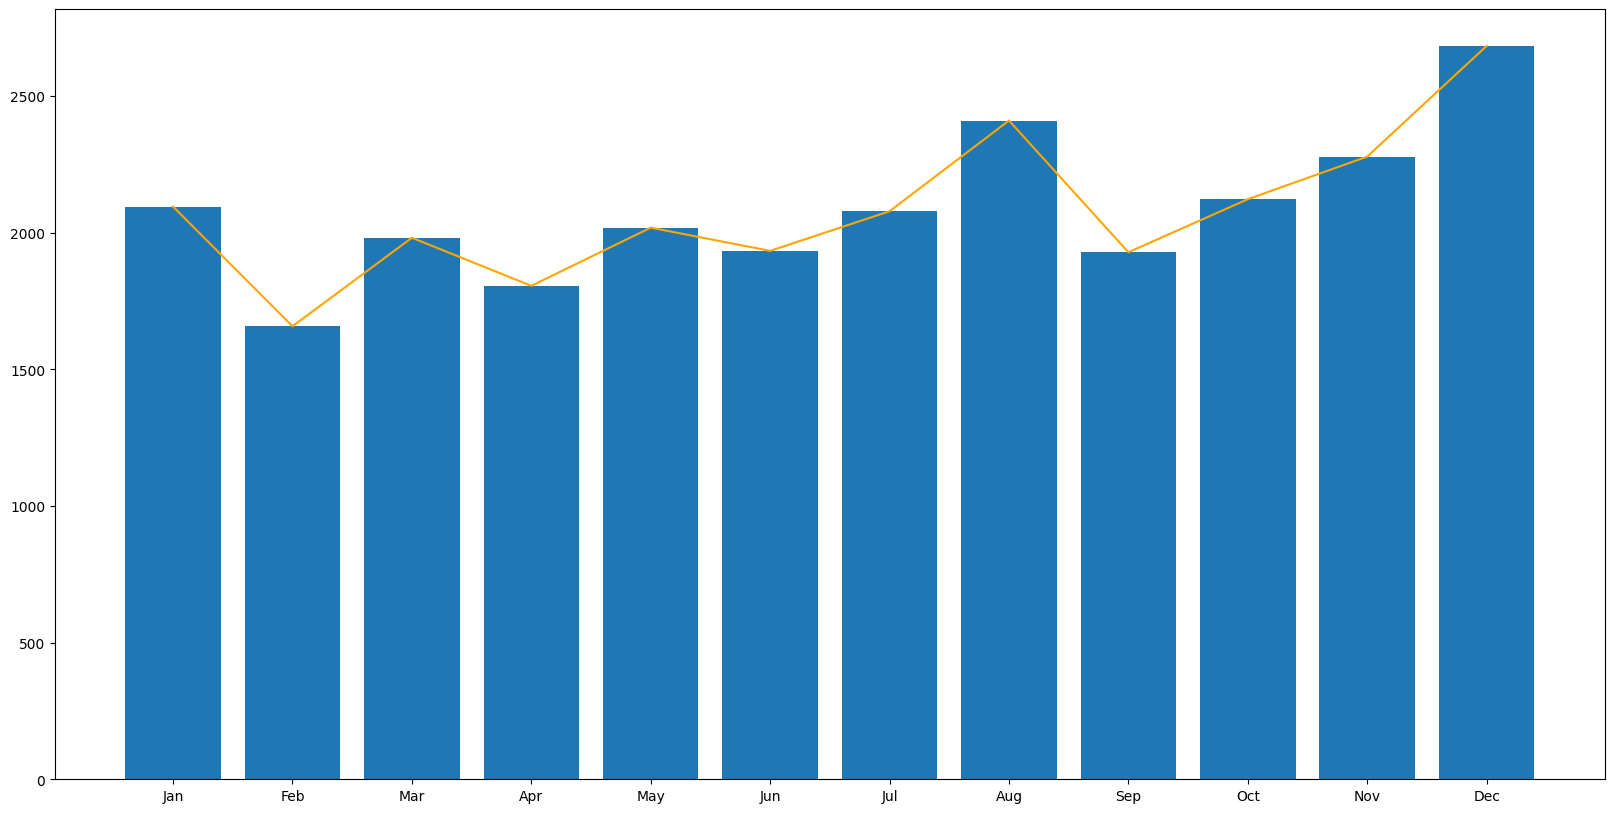

In [41]:
plt.figure(figsize=(20,10))
plt.bar(Total_unique_transaction.index,Total_unique_transaction["Transaction_ID"])
plt.plot(Total_unique_transaction,c="orange")
plt.show()

In [42]:
Quantity_permonth=Dataset_whole.groupby("Month")[["Quantity"]].sum().loc[custom_order]


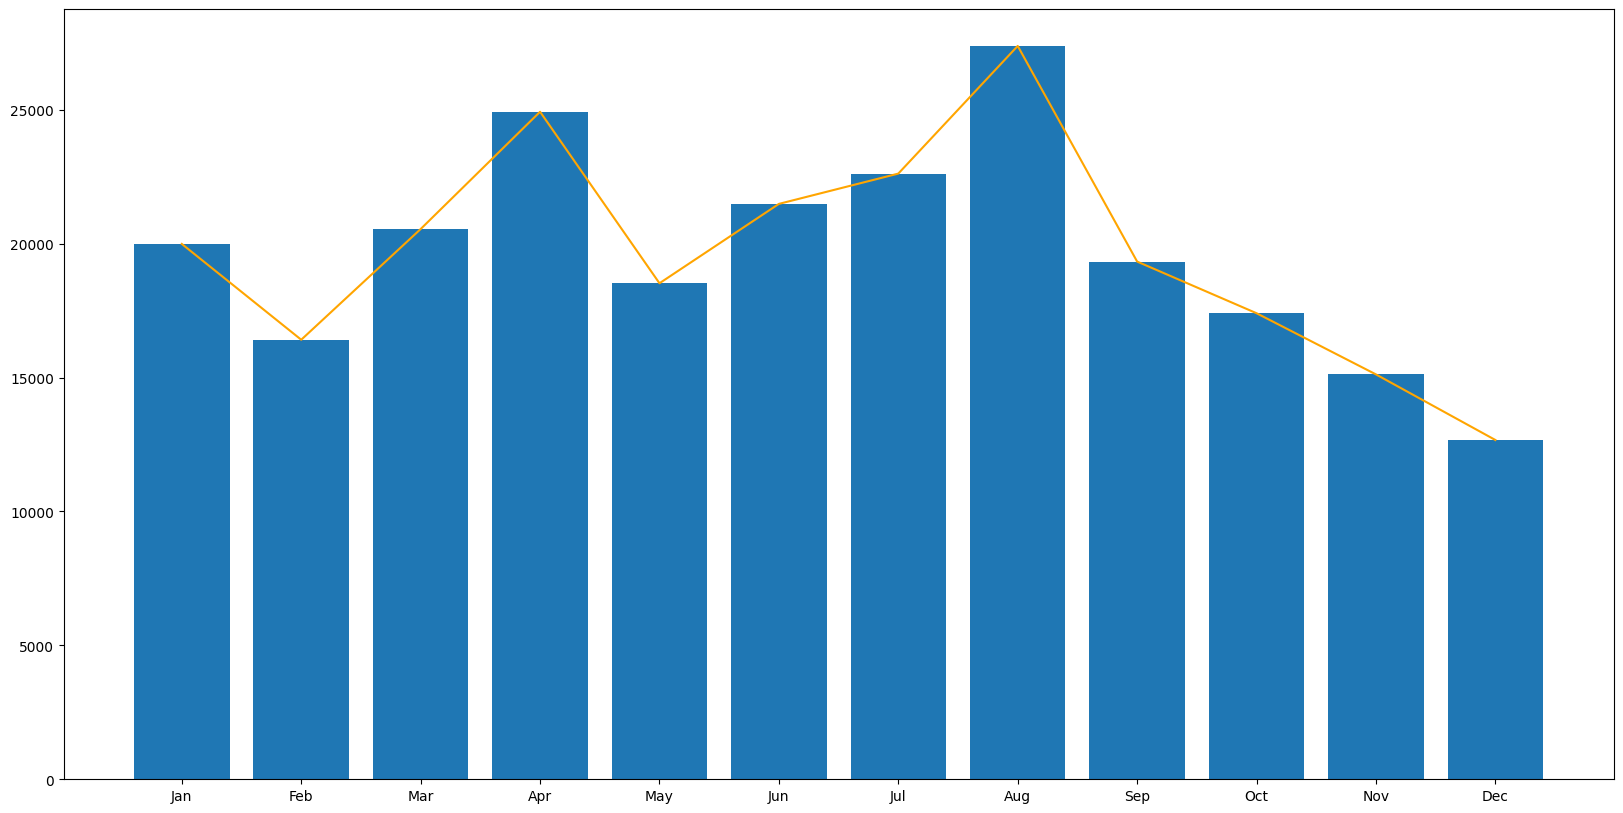

In [43]:
plt.figure(figsize=(20,10))
plt.bar(Quantity_permonth.index,Quantity_permonth["Quantity"])
plt.plot(Quantity_permonth,c="orange")
plt.show()

##  Understand the trends/seasonality of sales by category, location, month etc

In [44]:
Dataset_whole.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Month_number', 'Coupon_Code', 'Discount_pct',
       'Invoice_value', 'Sales_Revenue'],
      dtype='object')

In [45]:
Seasonal=Dataset_whole.groupby(["Month","Product_Category","Location"]).agg({"Sales_Revenue":sum}).reset_index()

In [46]:
Seasonal

,Month,Product_Category,Location,Sales_Revenue
0,Apr,Accessories,Chicago,51.28
1,Apr,Accessories,New Jersey,98.98
2,Apr,Android,Chicago,35.98
3,Apr,Apparel,California,21199.78
4,Apr,Apparel,Chicago,32418.51
...,...,...,...,...
764,Sep,Waze,California,70.57
765,Sep,Waze,Chicago,105.57
766,Sep,Waze,New Jersey,1.67
767,Sep,Waze,New York,18.98


<BarContainer object of 769 artists>

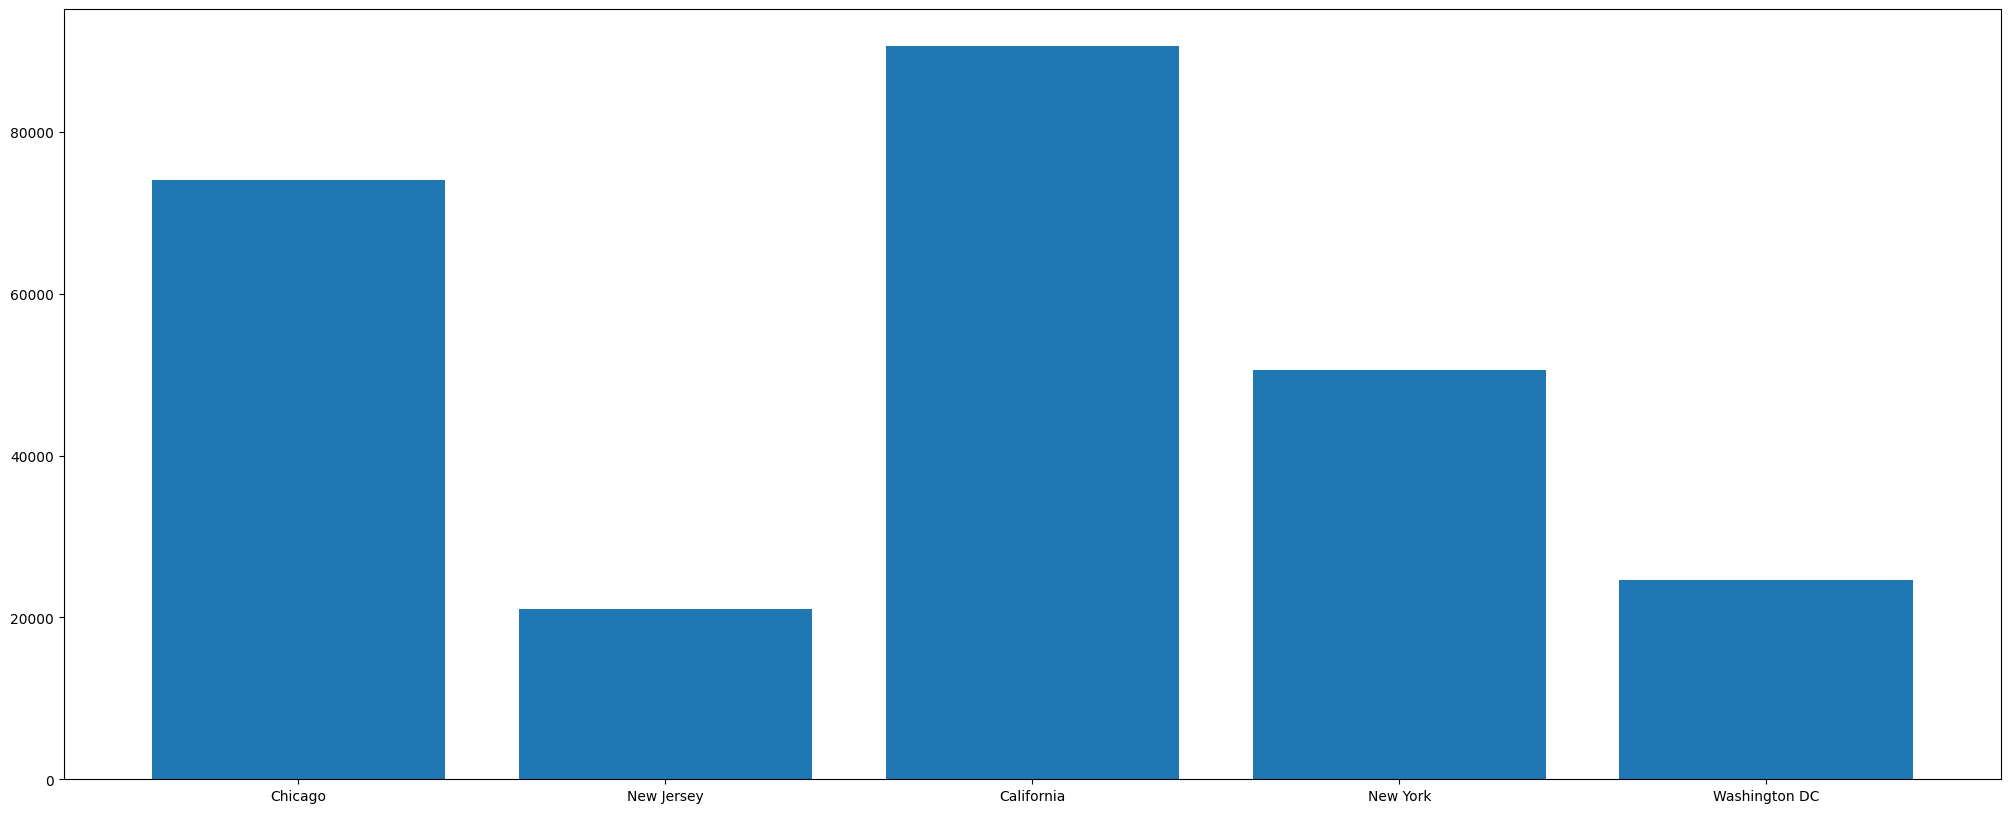

In [47]:
plt.figure(figsize=(25,10))
plt.bar(Seasonal["Location"],Seasonal["Sales_Revenue"])

##  How number order varies and sales with different days?

In [48]:
Dataset_whole["Days"]=Dataset_whole["Transaction_Date"].dt.day_name()

In [49]:
Dataset_whole.groupby("Days")[["Sales_Revenue"]].sum()

,Sales_Revenue
Days,
Friday,690544.52
Monday,289230.54
Saturday,536950.17
Sunday,548569.26
Thursday,675089.30
Tuesday,317220.78
Wednesday,660062.67


<Axes: xlabel='Days'>

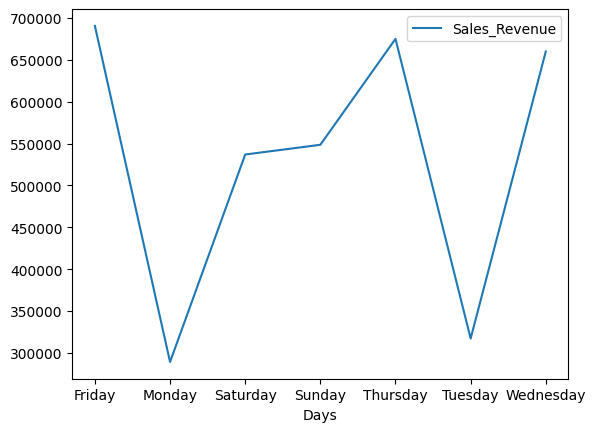

In [50]:
(Dataset_whole.groupby("Days")[["Sales_Revenue"]].sum()).plot()

<Axes: xlabel='Days'>

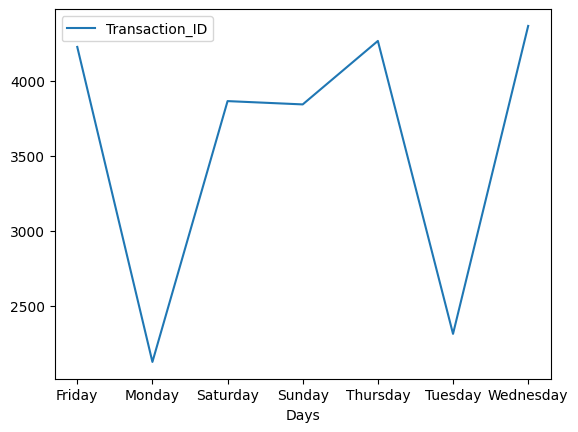

In [51]:
Dataset_order=Dataset_whole.drop_duplicates(subset="Transaction_ID")

(Dataset_order.groupby("Days")[["Transaction_ID"]].count()).plot()

##  Calculate the Revenue, Marketing spend, percentage of marketing spend out of revenue, Tax, percentage of delivery charges by month.


In [52]:
Dataset_whole.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'GST', 'Gender', 'Location',
       'Tenure_Months', 'Month', 'Month_number', 'Coupon_Code', 'Discount_pct',
       'Invoice_value', 'Sales_Revenue', 'Days'],
      dtype='object')

### Percentage of marketing spend out of revenue,

In [53]:
Marketing_Spend["Date"]=pd.to_datetime(Marketing_Spend["Date"])

In [54]:
Marketing_Spend["Month"]=Marketing_Spend["Date"].dt.strftime("%b")

In [55]:
Marketing_spend_by_month=Marketing_Spend.groupby("Month")[["Offline_Spend","Online_Spend"]].sum().reset_index()

In [56]:
Dataset_whole

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Gender,Location,Tenure_Months,Month,Month_number,Coupon_Code,Discount_pct,Invoice_value,Sales_Revenue,Days
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,M,Chicago,12,Jan,1,ELEC10,10,158.67,138.34,Tuesday
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,M,Chicago,12,Jan,1,ELEC10,10,158.67,138.34,Tuesday
2,17850,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.50,Not Used,...,M,Chicago,12,Jan,1,ELEC10,10,249.58,220.99,Tuesday
3,17850,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.50,Clicked,...,M,Chicago,12,Jan,1,ELEC10,10,87.19,73.35,Tuesday
4,17850,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Clicked,...,M,Chicago,12,Jan,1,ELEC10,10,158.67,138.34,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,17634,33973,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.00,0.00,Clicked,...,F,Chicago,32,Jul,7,GC10,10,23.62,22.50,Sunday
52520,17634,33975,2019-07-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1,25.00,0.00,Not Used,...,F,Chicago,32,Jul,7,GC10,10,23.62,22.50,Sunday
52521,16085,39991,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1,10.80,6.00,Clicked,...,M,California,15,Oct,10,NJ10,10,16.21,9.72,Sunday
52522,16085,39991,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1,9.60,6.00,Used,...,M,California,15,Oct,10,NJ10,10,15.07,8.64,Sunday


In [57]:
Revenu_by_month=Dataset_whole.groupby("Month")[["Sales_Revenue"]].sum().reset_index()

In [58]:
Marketing_spend_with_Sales_revenue=pd.merge(Marketing_spend_by_month,Revenu_by_month,on="Month",how="inner")

In [59]:
Marketing_spend_with_Sales_revenue["%marketing_spend_out_Sales_Revenue_by_month"]=((Marketing_spend_with_Sales_revenue["Offline_Spend"])+
                                                    (Marketing_spend_with_Sales_revenue["Online_Spend"]))/(Marketing_spend_with_Sales_revenue["Sales_Revenue"])
                                     

In [60]:
Marketing_spend_with_Sales_revenue

,Month,Offline_Spend,Online_Spend,Sales_Revenue,%marketing_spend_out_Sales_Revenue_by_month
0,Apr,96000,61026.83,357159.75,0.44
1,Aug,85500,57404.15,319556.82,0.45
2,Dec,122000,76648.75,366280.73,0.54
3,Feb,81300,55807.92,246658.92,0.56
4,Jan,96600,58328.95,360949.35,0.43
5,Jul,67500,52717.85,332562.23,0.36
6,Jun,80500,53818.14,223357.22,0.60
7,Mar,73500,48750.09,241980.71,0.51
8,May,65500,52759.64,243165.42,0.49
9,Nov,93000,68144.96,406866.13,0.40


### Percentage of Tax by month.

In [61]:
Dataset_whole["GST_amount"]=(Dataset_order["Avg_Price"])*(Dataset_whole["GST"])

In [62]:
Dataset_whole.groupby("Month")[["GST_amount"]].sum().loc[custom_order]

,GST_amount
Month,
Jan,20119.10
Feb,14086.62
Mar,15316.75
Apr,13154.84
May,13725.89
Jun,14389.65
Jul,14675.61
Aug,15441.98
Sep,14695.57


<Axes: xlabel='Month'>

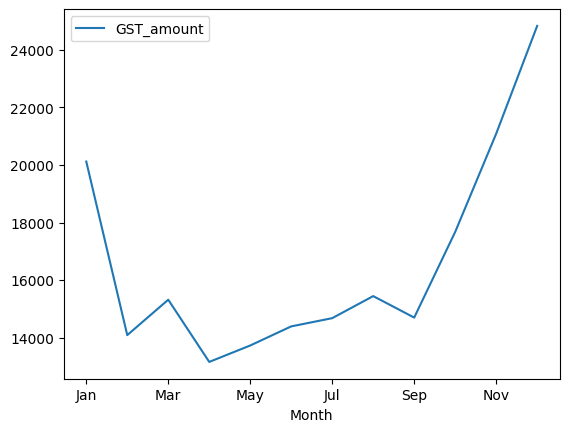

In [63]:
Dataset_whole.groupby("Month")[["GST_amount"]].sum().loc[custom_order].plot()

### Percentage of delivery charges by month.

In [64]:
Dataset_order.groupby("Month")[["Delivery_Charges"]].sum().loc[custom_order]

,Delivery_Charges
Month,
Jan,22078.52
Feb,16831.40
Mar,22092.44
Apr,15871.50
May,16094.35
Jun,15920.97
Jul,17229.78
Aug,21245.95
Sep,15766.61


<Axes: xlabel='Month'>

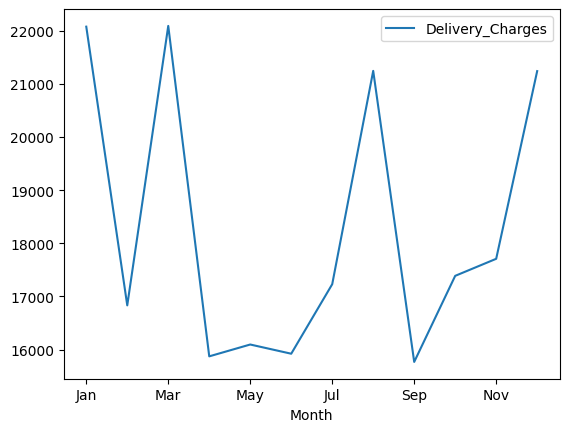

In [65]:
Dataset_order.groupby("Month")[["Delivery_Charges"]].sum().loc[custom_order].plot()

##  How marketing spend is impacting on revenue?

In [66]:
Marketing_spend_with_Sales_revenue["Total_spend"]=(Marketing_spend_with_Sales_revenue["Offline_Spend"])+(Marketing_spend_with_Sales_revenue["Online_Spend"])

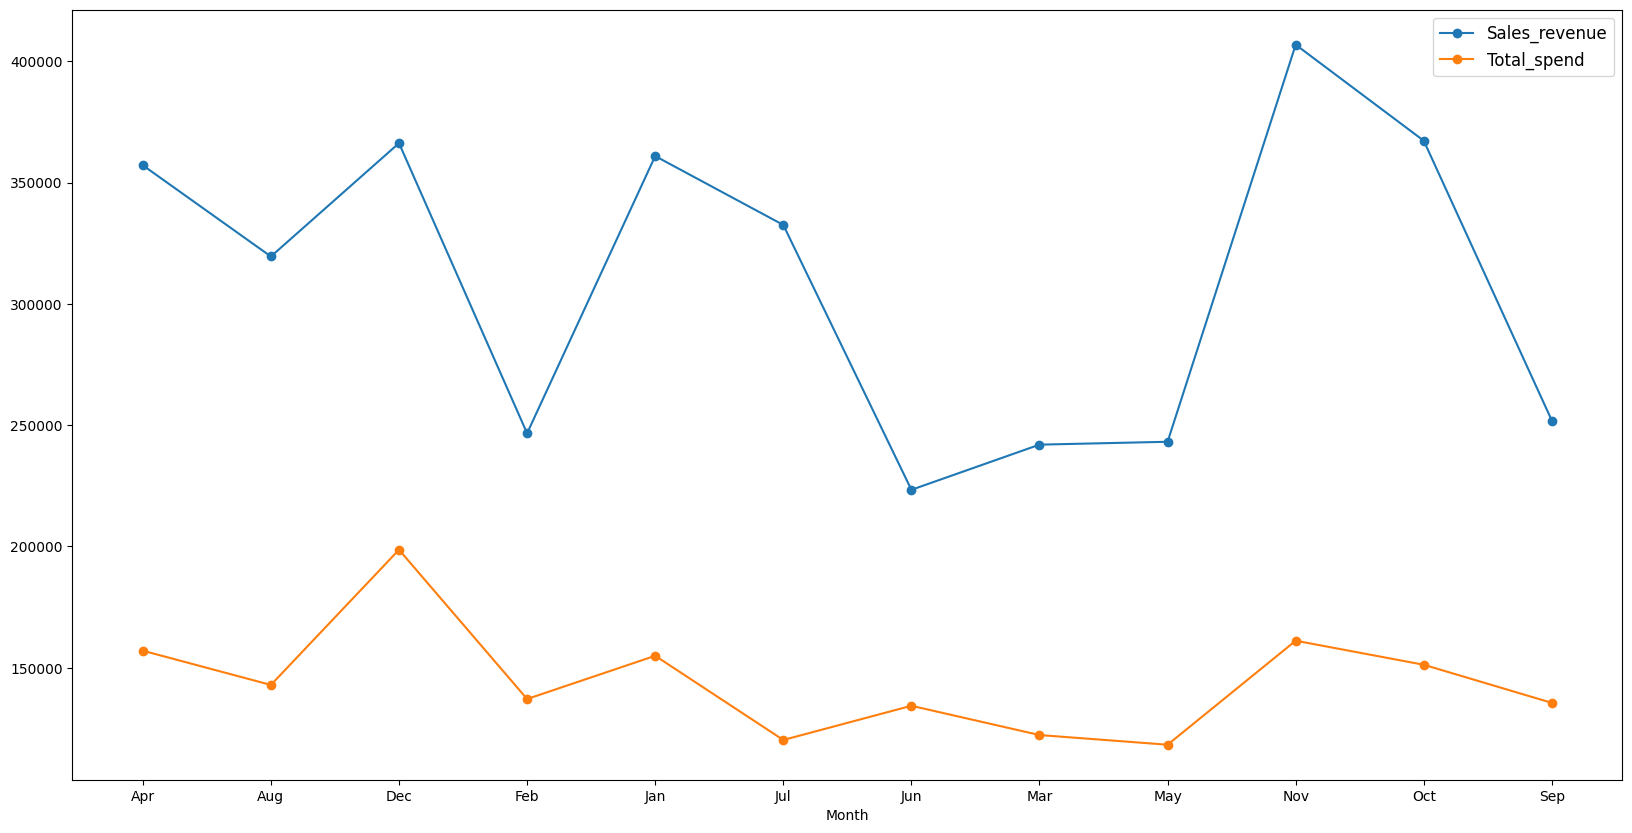

In [67]:
plt.figure(figsize=(20,10))
plt.plot(Marketing_spend_with_Sales_revenue.Month,Marketing_spend_with_Sales_revenue.Sales_Revenue,marker="o",label="Sales_revenue")
plt.plot(Marketing_spend_with_Sales_revenue.Month,Marketing_spend_with_Sales_revenue.Total_spend,marker="o",label="Total_spend")
plt.legend(fontsize="large")
plt.xlabel("Month")
plt.show()

##  Which product was purchased mostly based on the quantity?

In [68]:
Dataset_whole.groupby("Product_Description")[["Quantity"]].sum()

,Quantity
Product_Description,
1 oz Hand Sanitizer,2434
20 oz Stainless Steel Insulated Tumbler,392
22 oz Android Bottle,1010
22 oz YouTube Bottle Infuser,1080
23 oz Wide Mouth Sport Bottle,453
...,...
YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,184
YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,13
YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,12


##  Which product was appeared in the transactions?


In [69]:
Dataset_whole.groupby("Product_Description")[["Transaction_ID"]].count()

,Transaction_ID
Product_Description,
1 oz Hand Sanitizer,129
20 oz Stainless Steel Insulated Tumbler,113
22 oz Android Bottle,139
22 oz YouTube Bottle Infuser,129
23 oz Wide Mouth Sport Bottle,85
...,...
YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,83
YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,11
YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,7


# Performing Customer Segmentation

##  Heuristic (Value based, RFM) – Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same. 

In [70]:
RFM_Data=(Dataset_whole.groupby("CustomerID").agg({"Transaction_ID":"count","Sales_Revenue":"sum"})).reset_index().rename(columns={"Transaction_ID":"Frequency","Sales_Revenue":"Monetary"})

In [71]:
Recency=Dataset_whole.loc[:,["CustomerID","Transaction_Date"]]

In [72]:
Recency.drop_duplicates(subset="CustomerID",keep="last",inplace=True)

In [73]:
Date=(sorted(Dataset_whole["Transaction_Date"])[-1]).date() +pd.DateOffset(1)

In [74]:
Recency["recency"]=((Date-Recency["Transaction_Date"]).dt.days)

In [75]:
RFM_Data_Whole=pd.merge(Recency,RFM_Data,on="CustomerID",how="inner")

In [76]:
RFM_Data_Whole

,CustomerID,Transaction_Date,recency,Frequency,Monetary
0,13747,2019-01-03,363,1,138.34
1,15605,2019-01-10,356,12,2051.01
2,12855,2019-01-17,349,3,801.30
3,17235,2019-01-23,343,10,1648.99
4,14679,2019-01-31,335,1,138.34
...,...,...,...,...,...
1463,17585,2019-07-24,161,28,2830.95
1464,15719,2019-07-28,157,174,12720.23
1465,17634,2019-07-28,157,73,3376.80
1466,16085,2019-10-06,87,28,1866.08


### RFM segementation

In [77]:
Quantile=RFM_Data_Whole[["recency","Frequency","Monetary"]].quantile(q=[.25,.50,.75])
Quantile

,recency,Frequency,Monetary
0.25,95.00,10.00,509.48
0.50,178.00,21.00,1406.88
0.75,260.25,45.00,3142.38


In [78]:
Quantile_new=Quantile.to_dict()
Quantile_new

{'recency': {0.25: 95.0, 0.5: 178.0, 0.75: 260.25},
 'Frequency': {0.25: 10.0, 0.5: 21.0, 0.75: 45.0},
 'Monetary': {0.25: 509.48474999999996, 0.5: 1406.881, 0.75: 3142.38125}}

In [79]:
#We create two classes for the RFM segmentation since, being high recency is bad, while high frequency and monetary value is good.
# Arguments (x = value, y = recency, monetary_value, frequency, z = quartiles dict)
def RClass(x,y,z):
    if x <= z[y][0.25]:
        return 1
    elif x <= z[y][0.50]:
        return 2
    elif x <= z[y][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, y = recency, monetary_value, frequency, z = quartiles dict)
def FMClass(x,y,z):
    if x <= z[y][0.25]:
        return 4
    elif x <= z[y][0.50]:
        return 3
    elif x <= z[y][0.75]: 
        return 2
    else:
        return 1

In [80]:
RFM_Data_Whole['R_Quartile'] = RFM_Data_Whole['recency'].apply(RClass,args=('recency',Quantile_new,))
RFM_Data_Whole['F_Quartile'] = RFM_Data_Whole['Frequency'].apply(FMClass, args=('Frequency',Quantile_new,))
RFM_Data_Whole['M_Quartile'] = RFM_Data_Whole['Monetary'].apply(FMClass, args=('Monetary',Quantile_new,))

In [81]:
RFM_Data_Whole

,CustomerID,Transaction_Date,recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,13747,2019-01-03,363,1,138.34,4,4,4
1,15605,2019-01-10,356,12,2051.01,4,3,2
2,12855,2019-01-17,349,3,801.30,4,4,3
3,17235,2019-01-23,343,10,1648.99,4,4,2
4,14679,2019-01-31,335,1,138.34,4,4,4
...,...,...,...,...,...,...,...,...
1463,17585,2019-07-24,161,28,2830.95,2,2,2
1464,15719,2019-07-28,157,174,12720.23,2,1,1
1465,17634,2019-07-28,157,73,3376.80,2,1,1
1466,16085,2019-10-06,87,28,1866.08,1,2,2


In [82]:
# For R Quartile=1 reprsent the newly intract or latest intractive customer and intraction time increase as values goes towards 4 

RFM_Data_Whole1=RFM_Data_Whole.assign(R_seg=np.nan, FM_seg =np.nan)
RFM_Data_Whole1.R_seg[RFM_Data_Whole['R_Quartile']==4] = "3_Churn"
RFM_Data_Whole1.R_seg[RFM_Data_Whole['R_Quartile']==2] = "1_At_Risk"
RFM_Data_Whole1.R_seg[RFM_Data_Whole['R_Quartile']==3] = "1_At_Risk"
RFM_Data_Whole1.R_seg[RFM_Data_Whole['R_Quartile']==1] = "1_Active"

#For F_Quartile=1 means customer with higher frequency of shooping or higher spend for the iteams, which decrese as value goes to 0

RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==3) & (RFM_Data_Whole['M_Quartile']==1)] = "2_Gold"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==4) & (RFM_Data_Whole['M_Quartile']==1)] = "2_Gold"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==2) & (RFM_Data_Whole['M_Quartile']==2)] = "2_Gold"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==2) & (RFM_Data_Whole['M_Quartile']==1)] = "2_Gold"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==3) & (RFM_Data_Whole['M_Quartile']==2)] = "2_Gold"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==4) & (RFM_Data_Whole['M_Quartile']==2)] = "1_Silver"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==1) & (RFM_Data_Whole['M_Quartile']==3)] = "2_Gold"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==2) & (RFM_Data_Whole['M_Quartile']==3)] = "2_Gold"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==3) & (RFM_Data_Whole['M_Quartile']==3)] = "1_Silver"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==4) & (RFM_Data_Whole['M_Quartile']==3)] = "1_Silver"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==1) & (RFM_Data_Whole['M_Quartile']==4)] = "2_Gold"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==1) & (RFM_Data_Whole['M_Quartile']==2)] = "2_Gold"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==2) & (RFM_Data_Whole['M_Quartile']==4)] = "1_Silver"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==3) & (RFM_Data_Whole['M_Quartile']==4)] = "1_Silver"
RFM_Data_Whole1.FM_seg[(RFM_Data_Whole['F_Quartile']==4) & (RFM_Data_Whole['M_Quartile']==4)] = "0_Standard"
RFM_Data_Whole1.FM_seg.fillna("4_Premium", inplace=True)

In [83]:
RFM_Data_Whole1

,CustomerID,Transaction_Date,recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg
0,13747,2019-01-03,363,1,138.34,4,4,4,3_Churn,0_Standard
1,15605,2019-01-10,356,12,2051.01,4,3,2,3_Churn,2_Gold
2,12855,2019-01-17,349,3,801.30,4,4,3,3_Churn,1_Silver
3,17235,2019-01-23,343,10,1648.99,4,4,2,3_Churn,1_Silver
4,14679,2019-01-31,335,1,138.34,4,4,4,3_Churn,0_Standard
...,...,...,...,...,...,...,...,...,...,...
1463,17585,2019-07-24,161,28,2830.95,2,2,2,1_At_Risk,2_Gold
1464,15719,2019-07-28,157,174,12720.23,2,1,1,1_At_Risk,4_Premium
1465,17634,2019-07-28,157,73,3376.80,2,1,1,1_At_Risk,4_Premium
1466,16085,2019-10-06,87,28,1866.08,1,2,2,1_Active,2_Gold


In [84]:
#Need to retrive Premium customers who are churn now

RFM_Data_Whole1[((RFM_Data_Whole1.R_seg =="3.Churn") & (RFM_Data_Whole1.FM_seg =="4.Premium"))]

,CustomerID,Transaction_Date,recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg


### Scientific (using K-means)

In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [86]:
RFM_Data_Whole2=RFM_Data_Whole.loc[:,['recency','Frequency','Monetary']]

In [87]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
RFM_Data_Whole_scaled=pd.DataFrame(st.fit_transform(RFM_Data_Whole2),columns=RFM_Data_Whole2.columns)

In [88]:
#KMeans Clustering   input: standardized data, number of cluster
km_3 = KMeans(n_clusters=3, random_state=123).fit(RFM_Data_Whole_scaled)
km_4 = KMeans(n_clusters=4, random_state=123).fit(RFM_Data_Whole_scaled)
km_5 = KMeans(n_clusters=5, random_state=123).fit(RFM_Data_Whole_scaled)
km_6 = KMeans(n_clusters=6, random_state=123).fit(RFM_Data_Whole_scaled)
km_7 = KMeans(n_clusters=7, random_state=123).fit(RFM_Data_Whole_scaled)
km_8 = KMeans(n_clusters=8, random_state=123).fit(RFM_Data_Whole_scaled)

In [89]:
RFM_Data_Whole_scaled['Cluster_3'] = km_3.labels_
RFM_Data_Whole_scaled['Cluster_4'] = km_4.labels_
RFM_Data_Whole_scaled['Cluster_5'] = km_5.labels_
RFM_Data_Whole_scaled['Cluster_6'] = km_6.labels_
RFM_Data_Whole_scaled['Cluster_7'] = km_7.labels_
RFM_Data_Whole_scaled['Cluster_8'] = km_8.labels_

In [90]:
print('km_3 =',silhouette_score(RFM_Data_Whole_scaled, km_3.labels_))
print('km_4 =',silhouette_score(RFM_Data_Whole_scaled, km_4.labels_))
print('km_5 =',silhouette_score(RFM_Data_Whole_scaled, km_5.labels_))
print('km_6 =',silhouette_score(RFM_Data_Whole_scaled, km_6.labels_))
print('km_7 =',silhouette_score(RFM_Data_Whole_scaled, km_7.labels_))
print('km_8 =',silhouette_score(RFM_Data_Whole_scaled, km_8.labels_))

km_3 = 0.25048406465875644
km_4 = 0.29941916049431216
km_5 = 0.32203115101179597
km_6 = 0.5274568501030752
km_7 = 0.5975464794857015
km_8 = 0.6238178663919028


In [91]:
predect_seg = pd.DataFrame(RFM_Data_Whole_scaled.Cluster_3 ).rename(columns={'Cluster_3':'Pred_seg'})
predect_seg

,Pred_seg
0,0
1,0
2,0
3,0
4,0
...,...
1463,1
1464,1
1465,1
1466,1


In [92]:
seg_kmeans = pd.concat([RFM_Data_Whole, predect_seg], axis=1)
seg_kmeans.drop(columns = ['R_Quartile','F_Quartile','M_Quartile'], axis=1,inplace = True)

In [93]:
seg_kmeans

,CustomerID,Transaction_Date,recency,Frequency,Monetary,Pred_seg
0,13747,2019-01-03,363,1,138.34,0
1,15605,2019-01-10,356,12,2051.01,0
2,12855,2019-01-17,349,3,801.30,0
3,17235,2019-01-23,343,10,1648.99,0
4,14679,2019-01-31,335,1,138.34,0
...,...,...,...,...,...,...
1463,17585,2019-07-24,161,28,2830.95,1
1464,15719,2019-07-28,157,174,12720.23,1
1465,17634,2019-07-28,157,73,3376.80,1
1466,16085,2019-10-06,87,28,1866.08,1


# Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)

In [94]:
Dataset_whole.drop(columns="GST_amount",inplace=True)

In [95]:
#Each customer with first day of purchase
Cust_min=Dataset_whole.groupby("CustomerID")[["Transaction_Date"]].min().reset_index()

In [96]:
#Each customer with last day of purchase
Cust_max=Dataset_whole.groupby("CustomerID")[["Transaction_Date"]].max().reset_index()

In [97]:
Time_cycle_per_customer=(Cust_max["Transaction_Date"]-Cust_min["Transaction_Date"]).dt.days 

In [98]:
Average_customer_lif_span=(Time_cycle_per_customer.mean())/(Time_cycle_per_customer.count())
Average_customer_lif_span

0.04382410590322892

In [99]:
RFM_Data_Whole1

,CustomerID,Transaction_Date,recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg
0,13747,2019-01-03,363,1,138.34,4,4,4,3_Churn,0_Standard
1,15605,2019-01-10,356,12,2051.01,4,3,2,3_Churn,2_Gold
2,12855,2019-01-17,349,3,801.30,4,4,3,3_Churn,1_Silver
3,17235,2019-01-23,343,10,1648.99,4,4,2,3_Churn,1_Silver
4,14679,2019-01-31,335,1,138.34,4,4,4,3_Churn,0_Standard
...,...,...,...,...,...,...,...,...,...,...
1463,17585,2019-07-24,161,28,2830.95,2,2,2,1_At_Risk,2_Gold
1464,15719,2019-07-28,157,174,12720.23,2,1,1,1_At_Risk,4_Premium
1465,17634,2019-07-28,157,73,3376.80,2,1,1,1_At_Risk,4_Premium
1466,16085,2019-10-06,87,28,1866.08,1,2,2,1_Active,2_Gold


In [100]:
Cust_revenue=RFM_Data_Whole1

In [101]:
Cust_revenue=Cust_revenue.rename(columns={"Monetary":"Revenue"})


In [102]:
#CLV=customer life time value
Cust_revenue["CLV"]=Cust_revenue["Revenue"]*Average_customer_lif_span
Cust_revenue

,CustomerID,Transaction_Date,recency,Frequency,Revenue,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg,CLV
0,13747,2019-01-03,363,1,138.34,4,4,4,3_Churn,0_Standard,6.06
1,15605,2019-01-10,356,12,2051.01,4,3,2,3_Churn,2_Gold,89.88
2,12855,2019-01-17,349,3,801.30,4,4,3,3_Churn,1_Silver,35.12
3,17235,2019-01-23,343,10,1648.99,4,4,2,3_Churn,1_Silver,72.27
4,14679,2019-01-31,335,1,138.34,4,4,4,3_Churn,0_Standard,6.06
...,...,...,...,...,...,...,...,...,...,...,...
1463,17585,2019-07-24,161,28,2830.95,2,2,2,1_At_Risk,2_Gold,124.06
1464,15719,2019-07-28,157,174,12720.23,2,1,1,1_At_Risk,4_Premium,557.45
1465,17634,2019-07-28,157,73,3376.80,2,1,1,1_At_Risk,4_Premium,147.99
1466,16085,2019-10-06,87,28,1866.08,1,2,2,1_Active,2_Gold,81.78


In [103]:
Cust_revenue.describe()

,CustomerID,recency,Frequency,Revenue,R_Quartile,F_Quartile,M_Quartile,CLV
count,1468.00,1468.00,1468.00,1468.00,1468.00,1468.00,1468.00,1468.00
mean,15314.39,178.26,35.78,2532.47,2.50,2.53,2.50,110.98
std,1744.00,98.53,50.40,4086.34,1.12,1.14,1.12,179.08
min,12346.00,1.00,1.00,0.90,1.00,1.00,1.00,0.04
25%,13830.50,95.00,10.00,509.48,1.00,2.00,1.75,22.33
50%,15300.00,178.00,21.00,1406.88,2.00,3.00,2.50,61.66
75%,16882.25,260.25,45.00,3142.38,3.25,4.00,3.25,137.71
max,18283.00,365.00,682.00,62804.57,4.00,4.00,4.00,2752.35


In [104]:
def lifetime_value (x):
    if x.CLV < 50 :
        return 2
    elif x.CLV < 200:
        return 1
    else :
        return 0
    
# High value = 1
# Medium value = 2
# Low value = 3

In [105]:
Cust_revenue["CLV"]=Cust_revenue.apply(lifetime_value,axis=1)

In [106]:
Cust_revenue

,CustomerID,Transaction_Date,recency,Frequency,Revenue,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg,CLV
0,13747,2019-01-03,363,1,138.34,4,4,4,3_Churn,0_Standard,2
1,15605,2019-01-10,356,12,2051.01,4,3,2,3_Churn,2_Gold,1
2,12855,2019-01-17,349,3,801.30,4,4,3,3_Churn,1_Silver,2
3,17235,2019-01-23,343,10,1648.99,4,4,2,3_Churn,1_Silver,1
4,14679,2019-01-31,335,1,138.34,4,4,4,3_Churn,0_Standard,2
...,...,...,...,...,...,...,...,...,...,...,...
1463,17585,2019-07-24,161,28,2830.95,2,2,2,1_At_Risk,2_Gold,1
1464,15719,2019-07-28,157,174,12720.23,2,1,1,1_At_Risk,4_Premium,0
1465,17634,2019-07-28,157,73,3376.80,2,1,1,1_At_Risk,4_Premium,1
1466,16085,2019-10-06,87,28,1866.08,1,2,2,1_Active,2_Gold,1


In [107]:
CustomersData

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [108]:
Cust_clv_data=pd.merge(Cust_revenue,CustomersData,on="CustomerID",how="inner")

In [109]:
Cust_clv_data

,CustomerID,Transaction_Date,recency,Frequency,Revenue,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg,CLV,Gender,Location,Tenure_Months
0,13747,2019-01-03,363,1,138.34,4,4,4,3_Churn,0_Standard,2,F,Chicago,21
1,15605,2019-01-10,356,12,2051.01,4,3,2,3_Churn,2_Gold,1,F,California,21
2,12855,2019-01-17,349,3,801.30,4,4,3,3_Churn,1_Silver,2,F,New York,33
3,17235,2019-01-23,343,10,1648.99,4,4,2,3_Churn,1_Silver,1,M,California,12
4,14679,2019-01-31,335,1,138.34,4,4,4,3_Churn,0_Standard,2,M,California,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,17585,2019-07-24,161,28,2830.95,2,2,2,1_At_Risk,2_Gold,1,F,California,26
1464,15719,2019-07-28,157,174,12720.23,2,1,1,1_At_Risk,4_Premium,0,F,Chicago,16
1465,17634,2019-07-28,157,73,3376.80,2,1,1,1_At_Risk,4_Premium,1,F,Chicago,32
1466,16085,2019-10-06,87,28,1866.08,1,2,2,1_Active,2_Gold,1,M,California,15


In [110]:
# Creating dummie variables
Cust_clv_data = pd.get_dummies(Cust_clv_data, columns=['Location'], drop_first=True, prefix='Location')
Cust_clv_data = pd.get_dummies(Cust_clv_data, columns=['Gender'], drop_first=True, prefix='Gender')
Cust_clv_data = pd.get_dummies(Cust_clv_data, columns=['R_seg'], drop_first=True, prefix='R_seg')
Cust_clv_data= pd.get_dummies(Cust_clv_data, columns=['FM_seg'], drop_first=True, prefix='FM_seg')

In [111]:
Cust_clv_data.drop(columns=["Transaction_Date"],inplace=True)

In [112]:
Cust_revenue["CLV"].value_counts()

2    649
1    587
0    232
Name: CLV, dtype: int64

### Balancing the data

In [113]:
from imblearn.over_sampling import SMOTE

In [114]:
x = Cust_clv_data.loc[:,Cust_clv_data.columns.difference(['CLV'])]
y = Cust_clv_data.CLV

In [115]:
#balancing the data
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(x,y)

In [116]:
resampled_y.value_counts()

2    649
1    649
0    649
Name: CLV, dtype: int64

In [117]:
Cust_clv_data_new = pd.concat([resampled_X, resampled_y], axis=1)

In [118]:
Cust_clv_data_new.rename(columns={'Location_New Jersey':'Location_New_Jersey',
                               'Location_New York':'Location_New_York',
                               'Location_Washington DC':'Location_Washington_DC'},inplace=True)

In [119]:
Cust_clv_data_new

,CustomerID,FM_seg_1_Silver,FM_seg_2_Gold,FM_seg_4_Premium,F_Quartile,Frequency,Gender_M,Location_Chicago,Location_New_Jersey,Location_New_York,Location_Washington_DC,M_Quartile,R_Quartile,R_seg_1_At_Risk,R_seg_3_Churn,Revenue,Tenure_Months,recency,CLV
0,13747,0,0,0,4,1,0,1,0,0,0,4,4,0,1,138.34,21,363,2
1,15605,0,1,0,3,12,0,0,0,0,0,2,4,0,1,2051.01,21,356,1
2,12855,1,0,0,4,3,0,0,0,1,0,3,4,0,1,801.30,33,349,2
3,17235,1,0,0,4,10,1,0,0,0,0,2,4,0,1,1648.99,12,343,1
4,14679,0,0,0,4,1,1,0,0,0,0,4,4,0,1,138.34,26,335,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,17460,0,1,0,1,70,0,0,0,0,0,2,1,0,0,2016.51,17,131,1
1943,12532,0,1,0,2,42,0,0,0,0,0,2,2,1,0,2080.21,29,136,1
1944,13346,0,1,0,2,17,1,1,0,0,0,2,1,0,0,1890.85,19,45,1
1945,17704,0,1,0,2,34,0,0,0,0,0,2,2,1,0,2824.01,20,206,1


In [120]:
# splitting the data: separate out the feature/input/independant columns and dependant variable
feature_columns = Cust_clv_data_new.columns.difference(['CLV','CustomerID',"Revenue"])
feature_columns

Index(['FM_seg_1_Silver', 'FM_seg_2_Gold', 'FM_seg_4_Premium', 'F_Quartile',
       'Frequency', 'Gender_M', 'Location_Chicago', 'Location_New_Jersey',
       'Location_New_York', 'Location_Washington_DC', 'M_Quartile',
       'R_Quartile', 'R_seg_1_At_Risk', 'R_seg_3_Churn', 'Tenure_Months',
       'recency'],
      dtype='object')

In [121]:
# seperate the X and y columns
features = Cust_clv_data_new[feature_columns]
target = Cust_clv_data_new.CLV

# Feature selection

In [122]:
#Anova fclassification
from sklearn.feature_selection import f_classif,SelectKBest
sel=SelectKBest(f_classif).fit(features,target)
columns=features.columns[sel.get_support()]
columns

Index(['FM_seg_1_Silver', 'FM_seg_2_Gold', 'FM_seg_4_Premium', 'F_Quartile',
       'Frequency', 'Location_Chicago', 'Location_New_Jersey',
       'Location_New_York', 'M_Quartile', 'R_seg_1_At_Risk'],
      dtype='object')

In [123]:
Cust_clv_data_new[columns]

,FM_seg_1_Silver,FM_seg_2_Gold,FM_seg_4_Premium,F_Quartile,Frequency,Location_Chicago,Location_New_Jersey,Location_New_York,M_Quartile,R_seg_1_At_Risk
0,0,0,0,4,1,1,0,0,4,0
1,0,1,0,3,12,0,0,0,2,0
2,1,0,0,4,3,0,0,1,3,0
3,1,0,0,4,10,0,0,0,2,0
4,0,0,0,4,1,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...
1942,0,1,0,1,70,0,0,0,2,0
1943,0,1,0,2,42,0,0,0,2,1
1944,0,1,0,2,17,1,0,0,2,0
1945,0,1,0,2,34,0,0,0,2,1


In [124]:
Cust_clv_data_new.CLV

0       2
1       1
2       2
3       1
4       2
       ..
1942    1
1943    1
1944    1
1945    1
1946    1
Name: CLV, Length: 1947, dtype: int64

## Building model

In [125]:
#importing package
from sklearn.model_selection import train_test_split

#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(Cust_clv_data_new[columns],Cust_clv_data_new.CLV, test_size=0.3, random_state=56)

### Decision Trees

In [126]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz, export_graphviz
from sklearn.model_selection import GridSearchCV

In [127]:
#Model building
param_grid={"max_depth":np.arange(2,50),
            'max_features': np.arange(4,100)}
data_tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,n_jobs=-1,verbose=True)
data_tree.fit(train_x,train_y)

Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=True)

In [128]:
print('Best parameters : ',data_tree.best_params_)
print('Accuracy : ' ,data_tree.best_score_)

Best parameters :  {'max_depth': 6, 'max_features': 4}
Accuracy :  0.8935331825037707


In [129]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
#checking accuracy for trian data
print(metrics.classification_report(train_y,data_tree.predict(train_x)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       453
           1       0.93      0.79      0.86       456
           2       0.89      0.98      0.94       453

    accuracy                           0.91      1362
   macro avg       0.91      0.91      0.91      1362
weighted avg       0.91      0.91      0.91      1362



In [130]:
#checking accuracy for trian data
print(metrics.classification_report(test_y,data_tree.predict(test_x)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       196
           1       0.90      0.80      0.85       193
           2       0.90      0.97      0.93       196

    accuracy                           0.90       585
   macro avg       0.90      0.90      0.90       585
weighted avg       0.90      0.90      0.90       585



#### Decision Tree model is giving 90% accuracy for Test Data

In [131]:
### XGBOOST MODEL

In [132]:
#Importing Required packages
import xgboost

In [133]:
pargrid_xg = {'n_estimators': [60,70,80,90,100],
               'max_depth':[2,3,4,5,6,7,8,9,10]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBClassifier(), 
                        param_grid=pargrid_xg, 
                        cv=5,n_jobs=-1, verbose=1)

data_xg=gscv_xg.fit(train_x, train_y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


In [134]:
print('Best score : ' ,gscv_xg.best_params_)
print('Accuracy : ', gscv_xg.best_score_)

Best score :  {'max_depth': 2, 'n_estimators': 60}
Accuracy :  0.8957417582417582


In [135]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,data_tree.predict(train_x)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       453
           1       0.93      0.79      0.86       456
           2       0.89      0.98      0.94       453

    accuracy                           0.91      1362
   macro avg       0.91      0.91      0.91      1362
weighted avg       0.91      0.91      0.91      1362



In [136]:
#checking accuracy for trian data
print(metrics.classification_report(test_y,gscv_xg.predict(test_x)))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       196
           1       0.93      0.78      0.85       193
           2       0.89      1.00      0.94       196

    accuracy                           0.91       585
   macro avg       0.91      0.91      0.91       585
weighted avg       0.91      0.91      0.91       585



#### Xgboost Model is giving 91% accuracy on Test data

## Cross-Selling

In [137]:
#Importing packages
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [138]:
Online_Sales

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked


In [139]:
Online_Sales.Product_Description.value_counts()

Nest Learning Thermostat 3rd Gen-USA - Stainless Steel         3511
Nest Cam Outdoor Security Camera - USA                         3328
Nest Cam Indoor Security Camera - USA                          3230
Google Sunglasses                                              1523
Nest Protect Smoke + CO White Battery Alarm-USA                1361
                                                               ... 
Google Tee Red                                                    2
Google Women's Colorblock Tee White                               1
Compact Journal with Recycled Pages                               1
Android Women's Short Sleeve Tri-blend Badge Tee Light Blue       1
Google Large Standard Journal Grey                                1
Name: Product_Description, Length: 404, dtype: int64

In [140]:
# Clean up spaces in description 
Online_Sales['Product_Description'] = Online_Sales['Product_Description'].str.strip()

In [141]:
basket=Online_Sales.groupby(['CustomerID', 'Product_Description'])['Quantity'].sum().unstack().fillna(0)

In [142]:
basket

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12347,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
12348,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12350,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
12356,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18260,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
18269,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [143]:
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1    

In [144]:
basket_sets = basket.applymap(encode_units)

In [145]:
basket_sets

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,25L Classic Rucksack,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
12348,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18260,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18269,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [146]:
# Build up the frequent items
#Now that the data is structured properly, we can generate frequent item sets that have a support of 
#at least 70% (this number was chosen so that I could get enough useful examples):
frequent_itemsets = apriori(basket_sets, min_support=0.2, use_colnames=True)

C:\Users\amans\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [147]:
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
8,0.65,(Nest Cam Indoor Security Camera - USA)
10,0.65,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
9,0.65,(Nest Cam Outdoor Security Camera - USA)
33,0.54,"(Nest Cam Outdoor Security Camera - USA, Nest ..."
34,0.53,"(Nest Cam Indoor Security Camera - USA, Nest L..."
...,...,...
4,0.20,(Google Men's Vintage Badge Tee Black)
30,0.20,"(Nest Cam Indoor Security Camera - USA, Google..."
74,0.20,"(Nest Cam Outdoor Security Camera - USA, Googl..."
31,0.20,"(Nest Cam Outdoor Security Camera - USA, Googl..."


In [148]:
rules1 = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Google 22 oz Water Bottle),(Nest Cam Indoor Security Camera - USA),0.31,0.65,0.25,0.80,1.24,0.05,1.79,0.28
1,(Google 22 oz Water Bottle),(Nest Cam Outdoor Security Camera - USA),0.31,0.65,0.24,0.80,1.23,0.05,1.73,0.27
2,(Google 22 oz Water Bottle),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.31,0.65,0.25,0.82,1.26,0.05,1.95,0.30
3,(Google Laptop and Cell Phone Stickers),(Nest Cam Indoor Security Camera - USA),0.35,0.65,0.29,0.84,1.29,0.07,2.15,0.34
4,(Google Laptop and Cell Phone Stickers),(Nest Cam Outdoor Security Camera - USA),0.35,0.65,0.28,0.81,1.25,0.06,1.83,0.30
...,...,...,...,...,...,...,...,...,...,...
245,(Nest Protect Smoke + CO White Wired Alarm-USA...,"(Nest Cam Outdoor Security Camera - USA, Nest ...",0.34,0.33,0.21,0.61,1.86,0.10,1.73,0.70
246,(Nest Protect Smoke + CO White Wired Alarm-USA...,"(Nest Cam Outdoor Security Camera - USA, Nest ...",0.25,0.46,0.21,0.83,1.80,0.09,3.25,0.59
247,"(Nest Cam Indoor Security Camera - USA, Nest P...","(Nest Cam Outdoor Security Camera - USA, Nest ...",0.36,0.30,0.21,0.57,1.89,0.10,1.63,0.74
248,(Nest Protect Smoke + CO White Wired Alarm-USA...,"(Nest Cam Outdoor Security Camera - USA, Nest ...",0.34,0.33,0.21,0.61,1.85,0.09,1.71,0.69


In [149]:
#Generate the rules with their corresponding support, confidence and lift:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Google 22 oz Water Bottle),(Nest Cam Indoor Security Camera - USA),0.31,0.65,0.25,0.80,1.24,0.05,1.79,0.28
1,(Nest Cam Indoor Security Camera - USA),(Google 22 oz Water Bottle),0.65,0.31,0.25,0.38,1.24,0.05,1.12,0.55
2,(Nest Cam Outdoor Security Camera - USA),(Google 22 oz Water Bottle),0.65,0.31,0.24,0.38,1.23,0.05,1.11,0.53
3,(Google 22 oz Water Bottle),(Nest Cam Outdoor Security Camera - USA),0.31,0.65,0.24,0.80,1.23,0.05,1.73,0.27
4,(Google 22 oz Water Bottle),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.31,0.65,0.25,0.82,1.26,0.05,1.95,0.30
...,...,...,...,...,...,...,...,...,...,...
365,(Nest Cam Outdoor Security Camera - USA),"(Nest Cam Indoor Security Camera - USA, Nest P...",0.65,0.22,0.21,0.32,1.46,0.07,1.15,0.90
366,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,"(Nest Cam Outdoor Security Camera - USA, Nest ...",0.65,0.22,0.21,0.32,1.47,0.07,1.15,0.91
367,(Nest Protect Smoke + CO White Battery Alarm-USA),"(Nest Cam Outdoor Security Camera - USA, Nest ...",0.44,0.29,0.21,0.47,1.65,0.08,1.35,0.70
368,(Nest Protect Smoke + CO White Wired Alarm-USA),"(Nest Cam Outdoor Security Camera - USA, Nest ...",0.39,0.30,0.21,0.53,1.76,0.09,1.50,0.70


In [150]:
rules.sort_values(by='confidence', ascending=False )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
340,"(Nest Cam Outdoor Security Camera - USA, Nest ...",(Nest Cam Indoor Security Camera - USA),0.21,0.65,0.21,0.97,1.50,0.07,12.16,0.42
299,"(Nest Cam Outdoor Security Camera - USA, Nest ...",(Nest Cam Indoor Security Camera - USA),0.22,0.65,0.22,0.97,1.49,0.07,11.47,0.43
343,"(Nest Cam Outdoor Security Camera - USA, Nest ...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.22,0.65,0.21,0.96,1.47,0.07,7.96,0.41
327,"(Nest Cam Outdoor Security Camera - USA, Nest ...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.22,0.65,0.21,0.95,1.47,0.07,7.66,0.41
315,(Nest Protect Smoke + CO White Wired Alarm-USA...,(Nest Cam Indoor Security Camera - USA),0.23,0.65,0.22,0.95,1.46,0.07,6.95,0.41
...,...,...,...,...,...,...,...,...,...,...
28,(Nest Cam Outdoor Security Camera - USA),(Google Twill Cap),0.65,0.25,0.20,0.31,1.26,0.04,1.09,0.58
224,(Nest Cam Outdoor Security Camera - USA),"(Google 22 oz Water Bottle, Nest Learning Ther...",0.65,0.22,0.20,0.31,1.42,0.06,1.13,0.83
57,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,(Nest Thermostat E - USA),0.65,0.23,0.20,0.31,1.35,0.05,1.12,0.74
226,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,"(Nest Cam Outdoor Security Camera - USA, Googl...",0.65,0.22,0.20,0.31,1.42,0.06,1.13,0.84


In [151]:
# Filtering the dataframe . In this case, look for a lift of >=1 and high confidence of >=0.9:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.9) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
83,"(Nest Cam Outdoor Security Camera - USA, Googl...",(Nest Cam Indoor Security Camera - USA),0.28,0.65,0.25,0.91,1.40,0.07,3.79,0.40
90,"(Google Laptop and Cell Phone Stickers, Nest L...",(Nest Cam Indoor Security Camera - USA),0.28,0.65,0.25,0.91,1.40,0.07,3.80,0.40
101,"(Nest Cam Outdoor Security Camera - USA, Googl...",(Nest Cam Indoor Security Camera - USA),0.27,0.65,0.25,0.91,1.40,0.07,3.90,0.39
102,"(Nest Cam Indoor Security Camera - USA, Google...",(Nest Cam Outdoor Security Camera - USA),0.27,0.65,0.25,0.90,1.40,0.07,3.65,0.39
112,"(Nest Cam Outdoor Security Camera - USA, Googl...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.27,0.65,0.25,0.91,1.40,0.07,3.80,0.39
124,"(Nest Cam Outdoor Security Camera - USA, Nest ...",(Nest Cam Indoor Security Camera - USA),0.31,0.65,0.28,0.91,1.39,0.08,3.70,0.41
132,"(Nest Cam Indoor Security Camera - USA, Nest P...",(Nest Cam Outdoor Security Camera - USA),0.36,0.65,0.33,0.91,1.41,0.10,4.07,0.46
136,"(Nest Cam Outdoor Security Camera - USA, Nest ...",(Nest Cam Indoor Security Camera - USA),0.33,0.65,0.31,0.93,1.43,0.09,5.11,0.45
149,"(Nest Cam Indoor Security Camera - USA, Nest P...",(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.36,0.65,0.33,0.91,1.40,0.09,3.73,0.44
154,(Nest Protect Smoke + CO White Wired Alarm-USA...,(Nest Cam Indoor Security Camera - USA),0.34,0.65,0.31,0.92,1.42,0.09,4.44,0.44


# Predicting Next Purchase Day(How soon each customer can visit the store (0-30 days, 30-60 days, 60-90 days, 90+ days)

In [188]:
Transaction_count_data=Dataset_whole.groupby("CustomerID")[["Transaction_ID"]].count().reset_index()

In [189]:
Cust_purcahse_details=pd.merge(Cust_max,Cust_min,on="CustomerID",how="inner")
Cust_purcahse_details["Purcahse_period"]=(Cust_max["Transaction_Date"]-Cust_min["Transaction_Date"]).dt.days 

In [190]:
Cust_purcahse_details.drop(columns=["Transaction_Date_x","Transaction_Date_y"],inplace=True)

In [191]:
def purchased_day (x):
    if x.Purcahse_period <= 30 :   # Purchased days btw 0-30 = 0
        return 0                        
    elif x.Purcahse_period <= 60:  # Purchased days btw 30-60 = 1
        return 1                     
    elif x.Purcahse_period <= 90:  # Purchased days btw 60-90 = 2
        return 2
    else :                        # Purchased days of 90+ = 3
        return 3


In [192]:
Cust_purcahse_details['next_purchased'] = Cust_purcahse_details_final.apply(purchased_day, axis=1)

In [193]:
Cust_purcahse_details

,CustomerID,Purcahse_period,next_purchased
0,12346,0,0
1,12347,223,3
2,12348,119,3
3,12350,0,0
4,12356,0,0
...,...,...,...
1463,18259,0,0
1464,18260,105,3
1465,18269,76,2
1466,18277,0,0


In [194]:
CustomersData

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49
...,...,...,...,...
1463,14438,F,New York,41
1464,12956,F,Chicago,48
1465,15781,M,New Jersey,19
1466,14410,F,New York,45


In [198]:
# Merging data sets
Cust_purcahse_details1 = pd.merge(Cust_purcahse_details, CustomersData , on='CustomerID' , how='inner')
Cust_purcahse_details2 = pd.merge(Cust_revenue,Cust_purcahse_details1, on='CustomerID', how= 'inner' )
Cust_purcahse_details2.drop(columns=["Transaction_Date","Revenue"],inplace=True)

In [204]:
#Since the single day transaction has zero value.taking transaction(Freuency) for only repeat customers 
Cust_purcahse_details_final = Cust_purcahse_details2[Cust_purcahse_details2["Frequency"] != 1]

In [205]:
Cust_purcahse_details_final

,CustomerID,recency,Frequency,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg,CLV,Purcahse_period,next_purchased,Gender,Location,Tenure_Months
1,15605,356,12,4,3,2,3_Churn,2_Gold,1,0,0,F,California,21
2,12855,349,3,4,4,3,3_Churn,1_Silver,2,0,0,F,New York,33
3,17235,343,10,4,4,2,3_Churn,1_Silver,1,0,0,M,California,12
5,14491,345,4,4,4,4,3_Churn,0_Standard,2,1,0,F,California,6
6,13958,337,5,4,4,4,3_Churn,0_Standard,2,0,0,F,New Jersey,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,17585,161,28,2,2,2,1_At_Risk,2_Gold,1,0,0,F,California,26
1464,15719,157,174,2,1,1,1_At_Risk,4_Premium,0,144,3,F,Chicago,16
1465,17634,157,73,2,1,1,1_At_Risk,4_Premium,1,0,0,F,Chicago,32
1466,16085,87,28,1,2,2,1_Active,2_Gold,1,0,0,M,California,15


In [206]:
# Creating dummie variables
Cust_purcahse_details_final = pd.get_dummies(Cust_purcahse_details_final, columns=['R_seg'], drop_first=True, prefix='R_seg')
Cust_purcahse_details_final = pd.get_dummies(Cust_purcahse_details_final, columns=['FM_seg'], drop_first=True, prefix='FM_seg')
Cust_purcahse_details_final = pd.get_dummies(Cust_purcahse_details_final, columns=['Location'], drop_first=True, prefix='Location')
Cust_purcahse_details_final= pd.get_dummies(Cust_purcahse_details_final, columns=['Gender'], drop_first=True, prefix='Gender')

In [207]:
Cust_purcahse_details_final.head()

,CustomerID,recency,Frequency,R_Quartile,F_Quartile,M_Quartile,CLV,Purcahse_period,next_purchased,Tenure_Months,R_seg_1_At_Risk,R_seg_3_Churn,FM_seg_1_Silver,FM_seg_2_Gold,FM_seg_4_Premium,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Gender_M
1,15605,356,12,4,3,2,1,0,0,21,0,1,0,1,0,0,0,0,0,0
2,12855,349,3,4,4,3,2,0,0,33,0,1,1,0,0,0,0,1,0,0
3,17235,343,10,4,4,2,1,0,0,12,0,1,1,0,0,0,0,0,0,1
5,14491,345,4,4,4,4,2,1,0,6,0,1,0,0,0,0,0,0,0,0
6,13958,337,5,4,4,4,2,0,0,22,0,1,0,0,0,0,1,0,0,0


In [208]:
# Rename the columns to correct format
Cust_purcahse_details_final.rename(columns={'Location_New Jersey':'Location_New_Jersey',
                               'Location_New York':'Location_New_York',
                               'Location_Washington DC':'Location_Washington_DC'},inplace=True)

In [209]:
Cust_purcahse_details_final.next_purchased.value_counts()

0    860
3    426
2     65
1     51
Name: next_purchased, dtype: int64

###  Balancing the data

In [210]:
x = Cust_purcahse_details_final.loc[:,Cust_purcahse_details_final.columns.difference(['next_purchased'])]
y = Cust_purcahse_details_final.next_purchased

In [211]:
#balancing the data
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(x, y)

In [212]:
Cust_purcahse_details_final = pd.concat([resampled_X,resampled_y], axis=1)

In [213]:
Cust_purcahse_details_final.next_purchased.value_counts()

0    860
3    860
2    860
1    860
Name: next_purchased, dtype: int64

In [223]:
features_columns=Cust_purcahse_details_final.columns.difference(['next_purchased','CustomerID'])

In [226]:
features=Cust_purcahse_details_final[features_columns]
target=Cust_purcahse_details_final.next_purchased

# Feature selection

In [227]:
#Anova fclassification
from sklearn.feature_selection import f_classif,SelectKBest
sel=SelectKBest(f_classif).fit(features,target)
columns=features.columns[sel.get_support()]
columns

Index(['CLV', 'FM_seg_1_Silver', 'FM_seg_4_Premium', 'F_Quartile', 'Frequency',
       'Gender_M', 'Location_New_York', 'M_Quartile', 'Purcahse_period',
       'R_seg_3_Churn'],
      dtype='object')

### Model building

In [228]:
#importing package
from sklearn.model_selection import train_test_split

#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(Cust_purcahse_details_final[feature_columns],Cust_purcahse_details_final.next_purchased, test_size=0.3, random_state=50)

### Decision Trees

In [230]:
#Importing packages
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [232]:
#Model building
param_grid = {'max_depth': np.arange(2, 50),
             'max_features': np.arange(4,100)}
data_tree1 = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 3,n_jobs=-1, verbose=True)
data_tree1.fit(train_x,train_y)

Fitting 3 folds for each of 4608 candidates, totalling 13824 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             verbose=True)

In [233]:
print('Best parameters : ',data_tree1.best_params_)
print('Accuracy : ' ,data_tree1.best_score_)

Best parameters :  {'max_depth': 25, 'max_features': 9}
Accuracy :  0.6216696738850259


In [234]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,data_tree1.predict(train_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       605
           1       1.00      1.00      1.00       607
           2       1.00      1.00      1.00       614
           3       1.00      1.00      1.00       582

    accuracy                           1.00      2408
   macro avg       1.00      1.00      1.00      2408
weighted avg       1.00      1.00      1.00      2408



In [235]:
#checking accuracy for trian data
print(metrics.classification_report(test_y,data_tree1.predict(test_x)))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67       255
           1       0.70      0.74      0.72       253
           2       0.57      0.62      0.60       246
           3       0.49      0.43      0.46       278

    accuracy                           0.61      1032
   macro avg       0.61      0.61      0.61      1032
weighted avg       0.61      0.61      0.61      1032



#### Decision Tree model is giving 62 % accuracy on Test Data

### xgboost

In [239]:
pargrid_xg1 = {'n_estimators': [60,70,80,90,100],
               'max_depth':[2,3,4,5,6,7,8,9,10]}

gscv_xg1 = GridSearchCV(estimator=xgboost.XGBClassifier(), 
                        param_grid=pargrid_xg, 
                        cv=3,n_jobs=-1, verbose=1)

data_xg1=gscv_xg1.fit(train_x, train_y)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


In [243]:
print('Best score : ' ,gscv_xg1.best_params_)
print('Accuracy : ', gscv_xg1.best_score_)

Best score :  {'max_depth': 10, 'n_estimators': 70}
Accuracy :  0.6752535431864507


In [241]:
#checking accuracy for trian data
print(metrics.classification_report(train_y,gscv_xg1.predict(train_x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       605
           1       1.00      1.00      1.00       607
           2       1.00      1.00      1.00       614
           3       1.00      1.00      1.00       582

    accuracy                           1.00      2408
   macro avg       1.00      1.00      1.00      2408
weighted avg       1.00      1.00      1.00      2408



In [242]:
#checking accuracy for trian data
print(metrics.classification_report(test_y,gscv_xg1.predict(test_x)))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       255
           1       0.83      0.83      0.83       253
           2       0.70      0.77      0.73       246
           3       0.60      0.53      0.56       278

    accuracy                           0.72      1032
   macro avg       0.72      0.72      0.72      1032
weighted avg       0.71      0.72      0.72      1032



#### XGboost model is giving 72% Accuracy on Test data

## Cohort Analysis

In [244]:
Online_Sales

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...,...
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked
52920,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked


In [245]:
Online_Sales['total_sales'] = Online_Sales.Quantity * Online_Sales.Avg_Price

In [246]:
Online_Sales['Transaction_Date'] = pd.to_datetime(Online_Sales['Transaction_Date'] , format = '%Y%m%d')

In [249]:
Online_Sales['Transaction_month']=Online_Sales.Transaction_Date.apply(lambda x:x.strftime('%m'))
Online_Sales.head(2)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,total_sales,Transaction_month,CohortGroup
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,153.71,01,2019-01
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,153.71,01,2019-01


In [314]:
Online_Sales.set_index('CustomerID', inplace=True)

Online_Sales['CohortGroup'] = Online_Sales.groupby(level=0)['Transaction_Date'].min().apply(lambda x: x.strftime('%Y-%m'))
Online_Sales.reset_index(inplace=True)
Online_Sales.head()

,CustomerID,index,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,total_sales,Transaction_month,CohortGroup,CohortPeriod
0,17850,0,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,153.71,01,2019-01,1
1,17850,1,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,153.71,01,2019-01,2
2,17850,2,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.50,Used,2.05,01,2019-01,3
3,17850,3,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used,87.65,01,2019-01,4
4,17850,4,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.50,Used,16.50,01,2019-01,5


In [315]:
cohorts = Online_Sales.groupby(['CohortGroup', 'Transaction_month']).agg({'CustomerID': pd.Series.nunique,
                       'Transaction_ID': pd.Series.nunique,
                        'total_sales': pd.Series.sum})

In [316]:
cohorts.head(20)

CustomerID  Transaction_ID  total_sales
CohortGroup Transaction_month                                         
2019-01     01                        215            2102    403624.58
            02                         13             218     39230.64
            03                         24             294     46645.94
            04                         34             353    114342.41
            05                         23             216     29081.40
            06                         44             355     51392.43
            07                         35             400     83164.89
            08                         47             337     49687.83
            09                         23             240     40313.12
            10                         28             252     45824.79
            11                         20             190     40757.46
            12                         34             459     93254.57
2019-02     02                         96            1461    271589.16
            03                          7              60      8095.60
            04                          9              87     12709.89
            05                         16             159     21995.59
            06                         17             145     23458.86
            07                         22             271     41188.56
            08                         19             161     22313.65
            09                         15             220     44942.13

In [317]:
cohorts.rename(columns={'CustomerID': 'Total_Users',
                        'Transaction_ID': 'Total_orders','total_sales':'Revenue'}, inplace=True)

In [318]:
cohorts

Total_Users  Total_orders   Revenue
CohortGroup Transaction_month                                     
2019-01     01                         215          2102 403624.58
            02                          13           218  39230.64
            03                          24           294  46645.94
            04                          34           353 114342.41
            05                          23           216  29081.40
...                                    ...           ...       ...
2019-10     11                           6            29   9685.08
            12                           4            17   2775.17
2019-11     11                          68          1044 217196.31
            12                           7            21   4495.32
2019-12     12                         106          1288 246809.97

[78 rows x 3 columns]

In [319]:
def cohort_period(x):
    
    x['CohortPeriod'] = np.arange(len(x)) + 1
    return x

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head(20)

Total_Users  Total_orders   Revenue  \
CohortGroup Transaction_month                                        
2019-01     01                         215          2102 403624.58   
            02                          13           218  39230.64   
            03                          24           294  46645.94   
            04                          34           353 114342.41   
            05                          23           216  29081.40   
            06                          44           355  51392.43   
            07                          35           400  83164.89   
            08                          47           337  49687.83   
            09                          23           240  40313.12   
            10                          28           252  45824.79   
            11                          20           190  40757.46   
            12                          34           459  93254.57   
2019-02     02                          96          1461 271589.16   
            03                           7            60   8095.60   
            04                           9            87  12709.89   
            05                          16           159  21995.59   
            06                          17           145  23458.86   
            07                          22           271  41188.56   
            08                          19           161  22313.65   
            09                          15           220  44942.13   

                               CohortPeriod  
CohortGroup Transaction_month                
2019-01     01                            1  
            02                            2  
            03                            3  
            04                            4  
            05                            5  
            06                            6  
            07                            7  
            08                            8  
            09                            9  
            10                           10  
            11                           11  
            12                           12  
2019-02     02                            1  
            03                            2  
            04                            3  
            05                            4  
            06                            5  
            07                            6  
            08                            7  
            09                            8

In [308]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

cohort_group_size = cohorts['Total_Users'].groupby(level=0).first()
cohort_group_size

CohortGroup
2019-01    215
2019-02     96
2019-03    177
2019-04    163
2019-05    112
2019-06    137
2019-07     94
2019-08    135
2019-09     78
2019-10     87
2019-11     68
2019-12    106
Name: Total_Users, dtype: int64

In [312]:
cohorts

Transaction_month  Total_Users  Total_orders  \
CohortGroup CohortPeriod                                                
2019-01     1                           01          215          2102   
            2                           02           13           218   
            3                           03           24           294   
            4                           04           34           353   
            5                           05           23           216   
...                                    ...          ...           ...   
2019-10     2                           11            6            29   
            3                           12            4            17   
2019-11     1                           11           68          1044   
            2                           12            7            21   
2019-12     1                           12          106          1288   

                           Revenue  
CohortGroup CohortPeriod            
2019-01     1            403624.58  
            2             39230.64  
            3             46645.94  
            4            114342.41  
            5             29081.40  
...                            ...  
2019-10     2              9685.08  
            3              2775.17  
2019-11     1            217196.31  
            2              4495.32  
2019-12     1            246809.97  

[78 rows x 4 columns]

In [320]:
cohorts['Total_Users'].unstack(0).head(12)

CohortGroup,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
Transaction_month,,,,,,,,,,,,
01,215.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02,13.00,96.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03,24.00,7.00,177.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04,34.00,9.00,18.00,163.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05,23.00,16.00,35.00,14.00,112.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06,44.00,17.00,25.00,24.00,12.00,137.00,NaN,NaN,NaN,NaN,NaN,NaN
07,35.00,22.00,32.00,24.00,9.00,20.00,94.00,NaN,NaN,NaN,NaN,NaN
08,47.00,19.00,33.00,18.00,13.00,22.00,13.00,135.00,NaN,NaN,NaN,NaN
09,23.00,15.00,22.00,15.00,10.00,12.00,4.00,14.00,78.00,NaN,NaN,NaN


In [310]:
cust_retention = cohorts['Total_Users'].unstack(0).divide(cohort_group_size, axis=1)
cust_retention


CohortGroup,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
CohortPeriod,,,,,,,,,,,,
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,0.06,0.07,0.10,0.09,0.11,0.15,0.14,0.10,0.08,0.07,0.10,NaN
3,0.11,0.09,0.20,0.15,0.08,0.16,0.04,0.11,0.04,0.05,NaN,NaN
4,0.16,0.17,0.14,0.15,0.12,0.09,0.06,0.07,0.03,NaN,NaN,NaN
5,0.11,0.18,0.18,0.11,0.09,0.08,0.12,0.06,NaN,NaN,NaN,NaN
6,0.20,0.23,0.19,0.09,0.12,0.10,0.10,NaN,NaN,NaN,NaN,NaN
7,0.16,0.20,0.12,0.06,0.12,0.08,NaN,NaN,NaN,NaN,NaN,NaN
8,0.22,0.16,0.12,0.10,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.11,0.12,0.08,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


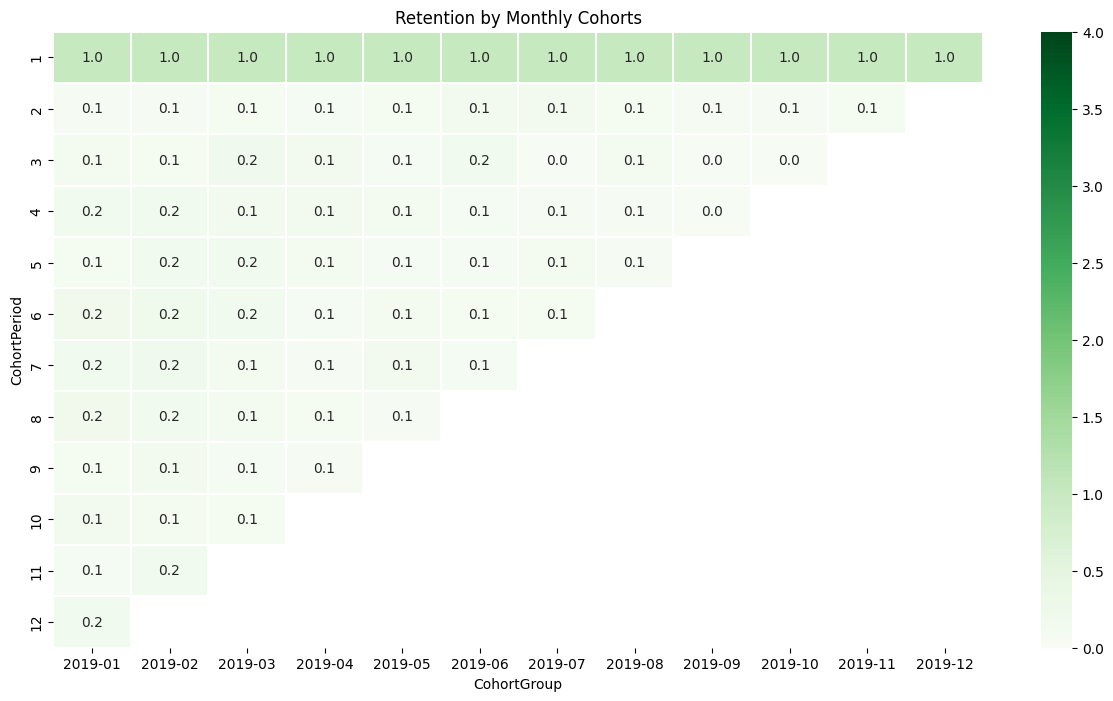

In [311]:
plt.figure(figsize=(15,8))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(data=cust_retention,
            annot = True,
            cmap = "Greens",
            vmin = 0.0,
            vmax = list(cust_retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3)

plt.savefig("Retention By Monthly Cohorts")
plt.show()